In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Neuroverkoissa (**Neural networks**) on yksi tai useampi piilokerros (**hidden layer**) input- ja output-kerrosten välissä. Niitä voidaan käyttää sekä luokitteluun että regressioon.

  Piilokerroksissa käytetyn aktivaatiofunktion (**activation funktion**) avulla saadaan aikaan monimutkaisempia laskukaavoja kuin lineaarisella ja logistisella regressiolla.

  Allaolevan näköisiä neuroverkkoja sanotaan tiheiksi neuroverkoiksi (**dense, fully connected**), koska niissä on kerroin jokaisesta edellisen kerroksen **neuron**ista jokaiseen seuraavan kerroksen neuroniin. 

  Jos piilokerroksia on paljon, puhutaan syvistä neuroverkoista ja syväoppimisesta (**deep neural networks, deep learning**).

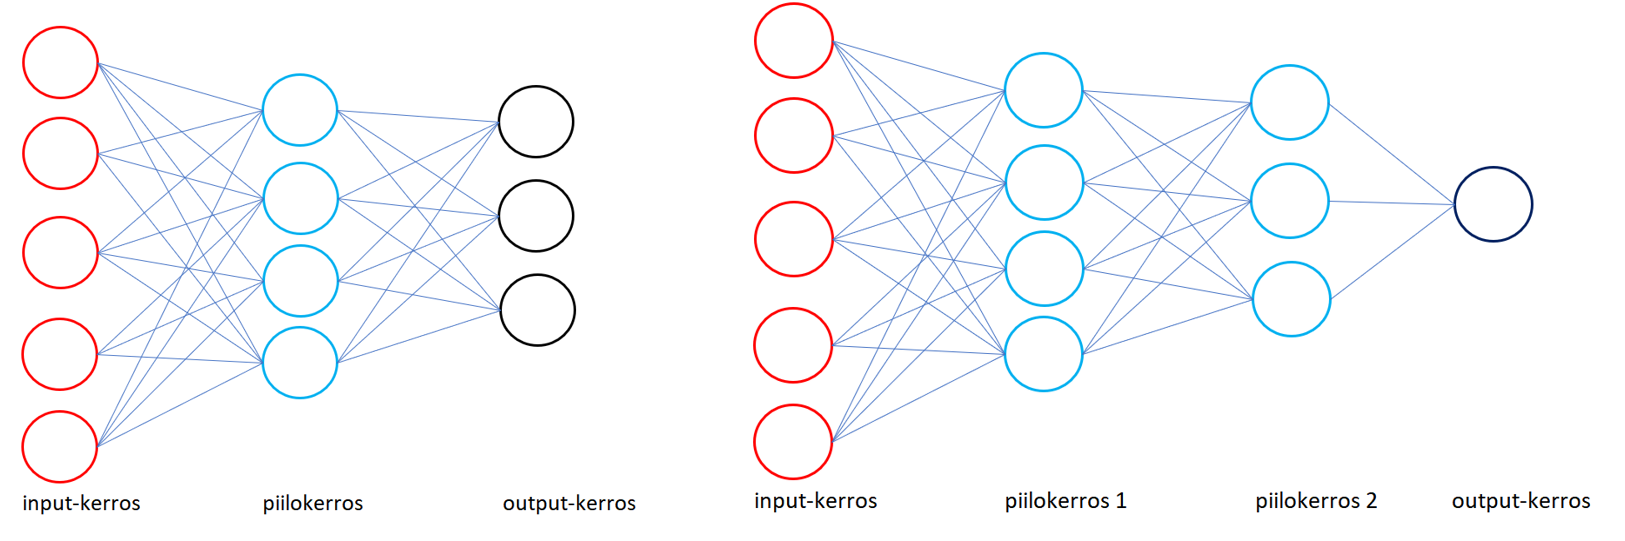


[3Blue1Brown: Neural Networks](
https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)

[M. Nielsen: Neural Networks and Deep Learning](
http://neuralnetworksanddeeplearning.com/)

[DeepLearningAI: Neural Networks and Deep Learning, 25 -](
https://www.youtube.com/playlist?list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0)

[DeepLearningAI: Hyperparameter Tuning, Regularization and Optimization](
https://www.youtube.com/watch?v=1waHlpKiNyY&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc)




## **Luokittelu, 2 muuttujaa, 2 luokkaa** 










Data: tason pisteet $x^{(i)}=[x^{(i)}_1,x^{(i)}_2]$ ja niiden luokat  $y^{(i)}=0$ tai $1$, $\quad i=1,2,\dots,m$

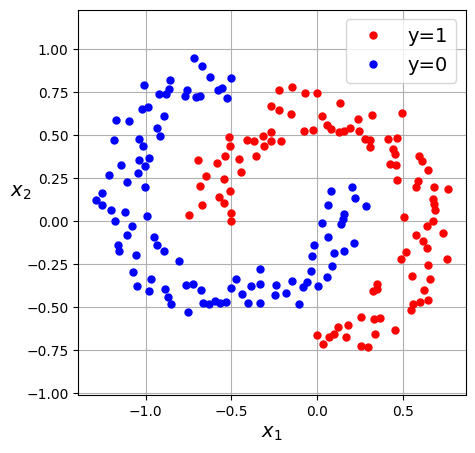

In [ ]:
n=100
m=2*n #datapisteiden määrä
np.random.seed(0)
#luokan 0 pisteet
r1=0.3*np.random.rand(n)+0.5
th1=-np.pi/2+np.linspace(0,1.5*np.pi,n)
x1pun=r1*np.cos(th1)
x1pun=x1pun.reshape(n,1)
x2pun=r1*np.sin(th1)
x2pun=x2pun.reshape(n,1)
#luokan 1 pisteet
r2=0.3*np.random.rand(n)+0.5
th2=-np.linspace(0,1.5*np.pi,n)
x1sin=r2*np.cos(th2)-0.5
x1sin=x1sin.reshape(n,1)
x2sin=r2*np.sin(th2)+0.2
x2sin=x2sin.reshape(n,1)
#datapisteet matriisin x vaakariveinä
xpun=np.hstack((x1pun,x2pun))
xsin=np.hstack((x1sin,x2sin))
x=np.vstack((xpun,xsin))
#pisteiden luokat 1D-vektorissa y
ypun=np.ones(n)
ysin=np.zeros(n)
y=np.hstack((ypun,ysin)) 


plt.figure(figsize=(5,5))
plt.plot(x[y==1,0],x[y==1,1],'ro',markersize=5,label='y=1')
plt.plot(x[y==0,0],x[y==0,1],'bo',markersize=5,label='y=0')
plt.axis('equal')
plt.grid()
plt.legend(fontsize=14,loc='upper right')
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.show()


Etsitään datapisteiden avulla kertoimet allaolevaan yhden piilokerroksen neuroverkkoon, jonka piilokerroksessa on 5 neuronia.

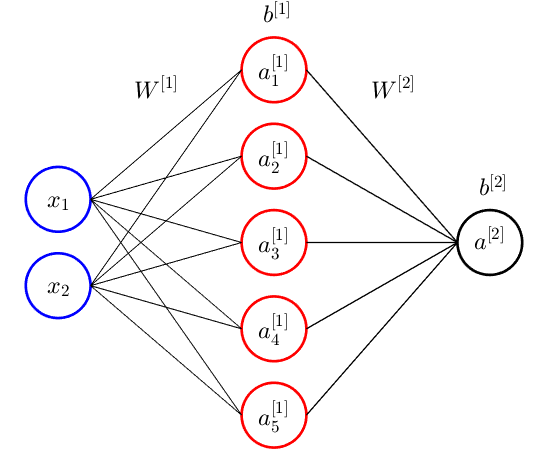


Piilokerroksen avulla saadaan  pisteiden luokitteluun monimutkaisempi laskukaava kuin logistisella regressiolla,
eli luokkia erottava käyrä ei ole välttämättä suora, vaan siitä saadaan "tarpeeksi monimutkainen".



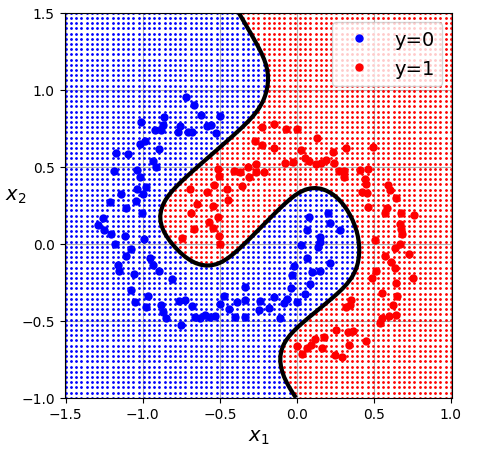

Kertoimet: 


$$
\begin{array}{l}
w^{[1]}_{jk}: \textrm{ input-kerros } \to \textrm{ piilokerros}\\\\
w^{[2]}_{k1}: \textrm{ piilokerros }\to \textrm{ output-kerros}\\\\
b^{[1]}_k: \textrm{ piilokerrroksen vakiotermit }\\\\
b^{[2]}: \textrm{ output-kerroksen vakiotermi}
\end{array}
$$ 



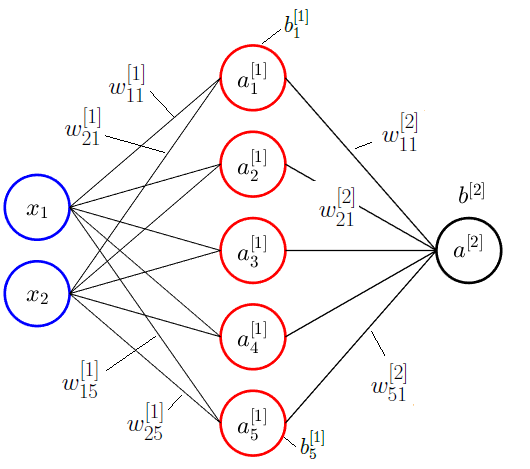

Pisteen 
$
x=[
x_1,
x_2
]$
luokittelu: 

lasketaan piilo- ja output-kerroksen "aktivaatiot" 


$$\left\{
\begin{array}{l}
z^{[1]}_1=w^{[1]}_{11}x_1+w^{[1]}_{21}x_2+b^{[1]}_1,\quad a^{[1]}_1=g(z^{[1]}_1)\\\\
z^{[1]}_2=w^{[1]}_{12}x_1+w^{[1]}_{22}x_2+b^{[1]}_2,\quad a^{[1]}_2=g(z^{[1]}_2)\\\\
z^{[1]}_3=w^{[1]}_{13}x_1+w^{[1]}_{23}x_2+b^{[1]}_3,\quad a^{[1]}_3=g(z^{[1]}_3)\\\\
z^{[1]}_4=w^{[1]}_{14}x_1+w^{[1]}_{24}x_2+b^{[1]}_4,\quad a^{[1]}_4=g(z^{[1]}_4)\\\\
z^{[1]}_5=w^{[1]}_{15}x_1+w^{[1]}_{25}x_2+b^{[1]}_5,\quad a^{[1]}_5=g(z^{[1]}_5)
\end{array}
\right.
$$









$$
\begin{array}{l}
z^{[2]}=w^{[2]}_{11}a^{[1]}_1+w^{[2]}_{21}a^{[1]}_2+\dots+w^{[2]}_{51}a^{[1]}_5+b^{[2]}\\\\
 a^{[2]}=\sigma(z^{[2]})\\\\
\end{array}
$$

missä $g(z)$ on piilokerroksen **aktivaatiofunktio** (activation function) ja 

$$
\begin{array}{l}\\
\end{array}
$$


$$
\sigma(z)=\frac{1}{1+\exp(-z)}
$$ on sigmoid. 

Piste $x$ kuuluu 



luokkaan $y=1,\textrm{ jos }z^{[2]}>0$ eli $a^{[2]}>0.5$ ja



luokkaan $y=0,\textrm{ jos }z^{[2]}<0$ eli $a^{[2]}<0.5$


$$
\begin{array}{l}
\\\\
\end{array}
$$

Tulkinta: $x$ kuuluu 



luokkaan $y=1$ todennäköisyydellä  $a^{[2]}$ 



luokkaan $y=0$ 
todennäköisyydellä  $1-a^{[2]}$


Yleisesti käytettyjä aktivaatiofunktioita:



Sigmoid

$$
g(z)=\frac{1}{1+\exp(-z)}
$$

$$\begin{array}{l}\\
\end{array}$$

Rectified Linear Unit (relu):

$$
g(z)=\max(z,0)=\left\{\begin{array}{l}z,\,\textrm{ jos } z> 0\\
0,\,\textrm{ jos } z\le  0\\\end{array}\right.
$$



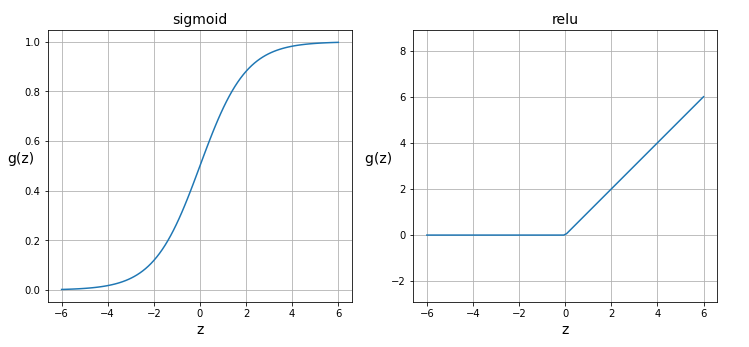

Matriiseilla ($\textrm{@}$ on matriisien kertolasku): 

$$\begin{array}{l}
x=[x_1,x_2],\quad 
W^{[1]}=\left[\begin{array}{ccccc}
w^{[1]}_{11}&w^{[1]}_{12}&w^{[1]}_{13}&w^{[1]}_{14}&w^{[1]}_{15}\\
w^{[1]}_{21}&w^{[1]}_{22}&w^{[1]}_{23}&w^{[1]}_{24}&w^{[1]}_{25}\\
\end{array}
\right]
,\quad 
 b^{[1]}=\left[
b^{[1]}_1,\,b^{[1]}_2,\,b^{[1]}_3,\,b^{[1]}_4,\,b^{[1]}_5
\right],\quad W^{[2]}=\left[\begin{array}{c}w^{[2]}_{11}\\w^{[2]}_{21}\\w^{[2]}_{31}\\w^{[2]}_{41}\\w^{[2]}_{51}\end{array}\right],\quad b^{[2]}=[b^{[2]}]\\\\
z^{[1]}=
x@W^{[1]}+b^{[1]}=[z^{[1]}_1,z^{[1]}_2,z^{[1]}_3,z^{[1]}_4,z^{[1]}_5]%W^{1}_{j,1}\cdot x_1+W^{1}_{j,2}\cdot x_2+b^1_j,\quad 
,\quad a^{[1]}=g(z^{[1]})=[g(z^{[1]}_1),g(z^{[1]}_2),g(z^{[1]}_3),g(z^{[1]}_4),g(z^{[1]}_5)]\\\\
z^{[2]}=a^{[1]}@W^{[2]}+b^{[2]},\quad  a^{[2]}=\sigma(z^{[2]})
\end{array}
$$

**Kertoimien määrääminen:** minimoidaan kustannusfunktio gradient descentillä

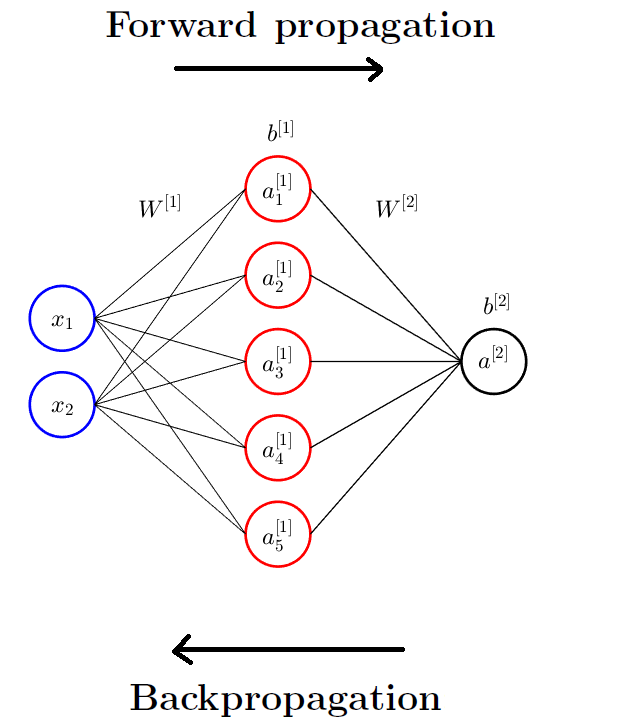

Annetaan kertoimille $W^{[1]},b^{[1]},W^{[2]},b^{[2]}$ alkuarvot

$$
\begin{array}{l}\\
\end{array}
$$

**Forward propagation:**
lasketaan datapisteille $
x^{(i)}=
[
x_1^{(i)},
x_2^{(i)}
]$ aktivaatiot

$\begin{array}{l}\\z^{[1](i)}=x^{(i)}@W^{[1]} +b^{[1]},\quad a^{[1](i)}=g(z^{[1](i)})\\\\
 z^{[2](i)}=a^{[1](i)}@W^{[2]} +b^{[2]},
\quad a^{[2](i)}=\sigma(z^{[2](i)})\\\\
\end{array}$


Kustannusfunktio (binary cross entropy)

$$
C=\displaystyle{\,\frac{1}{m}\,\sum_{i=1}^m C^{(i)}}$$

missä datapisteen kustannus

$$ C^{(i)}=  \left\{\begin{array}{l}
-\log(a^{[2](i)}), \, \textrm{ jos }y^{(i)}=1\\\\
-\log(1-a^{[2](i)}), \,\textrm{ jos }y^{(i)}=0
\end{array}
\right. 
$$ 

$$
\begin{array}{l}\\\end{array}
$$

**Backpropagation:**
lasketaan $C$:n osittaisderivaatat 


$$\begin{array}{l}
\\
\displaystyle{\frac{\partial C}{\partial b^{[2]}}=\frac{1}{m}}\,\sum_{i=1}^m (a^{[2](i)}-y^{(i)})
\\\\
\displaystyle{\frac{\partial C}{\partial w^{[2]}_{k1}}
=\frac{1}{m}}\,\sum_{i=1}^m(a^{[2](i)}-y^{(i)})a^{[1](i)}_k
\\\\
\displaystyle{\frac{\partial C}{\partial b^{[1]}_k}=\frac{1}{m}\,\sum_{i=1}^m w^{[2]}_{k1}(a^{[2](i)}-y^{(i)})g^\prime (z_k^{[1](i)})}
\\\\
\displaystyle{\frac{\partial C}{\partial w^{[1]}_{jk}}=\frac{1}{m}}\,\sum_{i=1}^m w^{[2]}_{k1}(a^{[2](i)}-y^{(i)})g^\prime(z_k^{[1](i)})x^{(i)}_j\\\\ j=1,2,\,k=1,2,...,5\\\\\\
\end{array}$$

ja päivitetään kertoimet (gradient descent):

$$\begin{array}{l}
b^{[2]}=b^{[2]}-\alpha\cdot \displaystyle{\frac{\partial C}{\partial b^{[2]}}}
\\\\
w^{[2]}_{k1}=w^{[2]}_{k1}-\alpha\cdot \displaystyle{\frac{\partial C}{\partial w^{[2]}_{k1}}}
 \\\\
b^{[1]}_k=b^{[1]}_k-\alpha\cdot \displaystyle{\frac{\partial C}{\partial b^{[1]}_k}}
\\\\
w^{[1]}_{jk}=w^{[1]}_{jk}-\alpha\cdot \displaystyle{\frac{\partial C}{\partial w^{[1]}_{jk}}}
\\\\
j=1,2,\,k=1,2,\dots,5\\\\
\end{array}$$

missä $\alpha>0$ on oppimisnopeus (learning rate)


**Huom:** $g^\prime(z)$ on piilokerroksen aktivaatiofunktion $g(z)$ derivaatta

Sigmoid

$$
g(z)=\frac{1}{1+\exp(-z)}\quad \to \quad g^\prime(z)=\frac{\exp(-z)}{(1+\exp(-z))^2}
$$

Rectified Linear Unit (relu):

$$
g(z)=\max(z,0)=\left\{\begin{array}{l}z,\,\textrm{ jos } z> 0\\
0,\,\textrm{ jos } z\le  0\\\end{array}\right.
\quad \to \quad g^\prime(z)=
\left\{\begin{array}{l}1,\,\textrm{ jos } z> 0\\
0,\,\textrm{ jos } z\le  0\\\end{array}\right.
$$




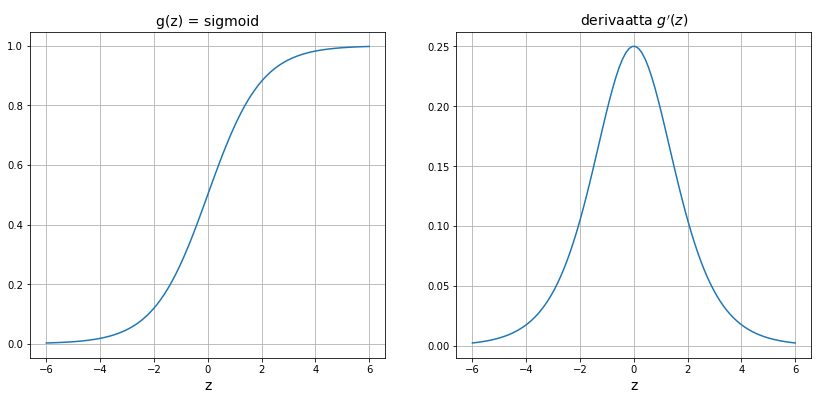

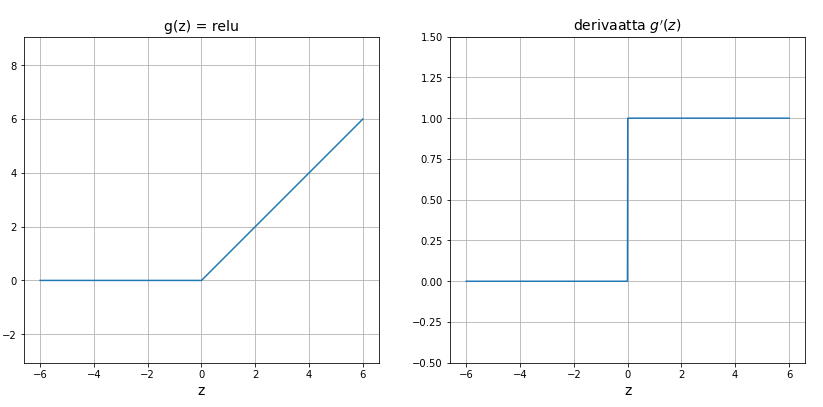

Matriiseilla: ($@$ on matriisikertolasku ja $\ast$ alkioittainen)

Datapisteet matriisin $x$ vaakariveinä ja niiden luokat pystyvektorissa $y$

$$
x=\left[
\begin{array}{cc}
x^{(1)}_1&x^{(1)}_2\\
x^{(2)}_1&x^{(2)}_2\\
\vdots&\vdots\\
x^{(m)}_1&x^{(m)}_2
\end{array}
\right], \quad y=\left[\begin{array}{c}y^{(1)}\\y^{(2)}\\\vdots\\y^{(m)}\end{array}\right]
$$

Forward propagation:

$$\begin{array}{l}
z^{[1]}=x@W_1+b^{[1]},\quad a^{[1]}=
g(z^{[1]})
\quad (m\times 5)\\\\
z^{[2]}=a^{[1]}@W_2+b^{[2]},
\quad 
 a^{[2]}=
\sigma(z^{[2]})
\quad (m\times 1)\\\\
Ci=-y\ast \log(a^{[2]})-(1-y)\ast \log(1-a^{[2]})\quad (m\times 1)\\\\
\displaystyle{C=\frac{1}{m}\sum_{i=1}^m (Ci)_i}\\\\\end{array}$$





Backpropagation:

$$\begin{array}{l}
\delta_2=a^{[2]}-y\quad (m\times 1)\\\\
\displaystyle{\frac{\partial C}{\partial b^{[2]}}=\frac{1}{m}\sum_{i=1}^m\delta_{2i}}\\\\
\displaystyle{\frac{\partial C}{\partial W^{[2]}}=\frac{1}{m} \,(a^{[1]})^T@ \delta_2} \quad (5\times 1)\\\\
\delta_1=\delta_2@(W^{[2]})^T\ast g^\prime(z^{[1]})\quad (m\times 5)\\\\ 
\displaystyle{\frac{\partial C}{\partial b^{[1]}_j}}=\frac{1}{m}\sum_{i=1}^m(\delta_1)_{ij},\quad j=1,2,\dots,5\\\\
\displaystyle{\frac{\partial C}{\partial W^{[1]}}=\frac{1}{m} \,x^T@ \delta_1}\quad (2\times 5)\\\\\end{array}$$

Kertoimien päivitys:

$$\begin{array}{l}
b^{[2]}=b^{[2]}-\alpha\cdot \displaystyle{\frac{\partial C}{\partial b^{[2]}}}
\\\\
W^{[2]}=W^{[2]}-\alpha\cdot \displaystyle{\frac{\partial C}{\partial W^{[2]}}}
 \\\\
b^{[1]}=b^{[1]}-\alpha\cdot \displaystyle{\frac{\partial C}{\partial b^{[1]}}}
\\\\ 
W^{[1]}=W^{[1]}-\alpha\cdot \displaystyle{\frac{\partial C}{\partial W^{[1]}}}
\\\\
\end{array}$$



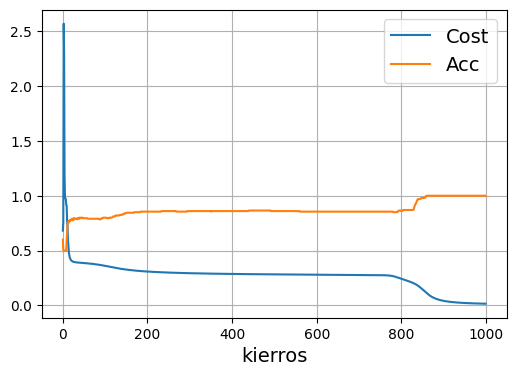

In [ ]:
#alkuarvot kertoimille
W1=1*np.random.randn(2,5)
b1=0*np.random.randn(1,5)
W2=1*np.random.randn(5,1)
b2=0*np.random.randn(1,1)

alfa=10 #learning rate
Y=y.reshape((m,1)) #y pystyvektoriksi
N=1000 #päivityskierrosten määrä

Cost=np.zeros(N) #kustannusten arvot 
Accuracy=np.zeros(N) #tarkkuus = kuinka suuri osa datapisteistä luokiteltu oikein

for k in range(N):
  #forward propagation
  z1=x@W1+b1
  a1=1/(1+np.exp(-z1)) #g(z1), aktivaatiofunktio sigmoid
  z2=a1@W2+b2
  a2=1/(1+np.exp(-z2))
  Ci=-Y*np.log(a2+1e-10)-(1-Y)*np.log(1-a2+1e-10)
  Cost[k]=1/m*np.sum(Ci)
  #datapisteiden ennustetut luokat
  ypred=np.zeros(m)
  ypred[a2[:,0]>=0.5]=1
  #oikein luokiteltujen datapisteiden osuus
  Accuracy[k]=len(y[y==ypred])/m
  #backpropagation
  #kustannusfunktion osittaisderivaatat  
  d2=a2-Y
  dCb2=1/m*np.sum(d2)
  dCW2=1/m*a1.T@d2
  dgz1=np.exp(-z1)/(1+np.exp(-z1))**2 #g'(z1) = aktivaatiofunktion derivaatta
  d1=d2@W2.T*dgz1
  dCb1=1/m*np.sum(d1,axis=0,keepdims=True)
  dCW1=1/m*x.T@d1
  #päivitetään kertoimet
  b1=b1-alfa*dCb1
  W1=W1-alfa*dCW1
  b2=b2-alfa*dCb2
  W2=W2-alfa*dCW2

plt.figure(figsize=(6,4)) 
plt.plot(Cost,label='Cost')
plt.plot(Accuracy,label='Acc')
plt.grid()
plt.xlabel('kierros',fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [ ]:
#viimeiset kertoimet
print(W1,'\n')
print(b1,'\n')
print(W2,'\n')
print(b2,'\n')
#ja kustannusfunktion arvo
print(Cost[N-1])

[[ 11.86330207  -7.42511902 -10.2013959  -10.16533376  -5.88959368]
 [  6.95796781   7.24821559  11.72844124  -8.04715844   7.40062284]] 

[[ -5.30755888  -2.28736712 -12.75483053  -8.56436889   3.67643883]] 

[[  9.41241347]
 [ 10.22633467]
 [-10.7438766 ]
 [-10.01598769]
 [ -9.79558655]] 

[[4.62060626]] 

0.015006548971401214


In [ ]:
#testipisteen luokittelu
xt=np.array([[-0.5,-0.2]])
z1t=xt@W1+b1
a1t=1/(1+np.exp(-z1t))
z2t=a1t@W2+b2
a2t=1/(1+np.exp(-z2t))
print(z2t,'\n')
print(a2t)

[[-1.40271816]] 

[[0.19738513]]


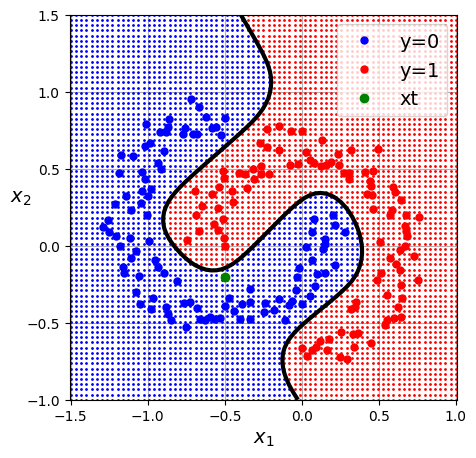

In [ ]:
#kuva syntyvästä tason pisteiden luokittelusta
M=75
x1=np.linspace(-1.5,1,M)
x2=np.linspace(-1,1.5,M)
x1,x2=np.meshgrid(x1,x2)
X1=x1
X2=x2
x1=x1.reshape((M*M,1))
x2=x2.reshape((M*M,1))
xx=np.hstack((x1,x2))
zz1=xx@W1+b1
aa1=1/(1+np.exp(-zz1))
zz2=aa1@W2+b2

ZZ2=zz2.reshape((M,M))

plt.figure(figsize=(5,5))
plt.plot(x[y==0,0],x[y==0,1],'bo',markersize=5,label='y=0')
plt.plot(x[y==1,0],x[y==1,1],'ro',markersize=5,label='y=1')
plt.plot(x1[zz2>0],x2[zz2>0],'r.',markersize=2)
plt.plot(x1[zz2<=0],x2[zz2<=0],'b.',markersize=2)
plt.contour(X1,X2,ZZ2,levels=[0.0],colors=['k'],linewidths=[3])
plt.plot(xt[0,0],xt[0,1],'go',label='xt')
plt.axis('equal')
plt.grid()
plt.legend(fontsize=14,loc='upper right')
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.show()

Miksi piilokerroksessa käytetään aktivaatiofunktiota   ?

Jos laskettaisiin ilman sitä eli

$$
\begin{array}{rcl}
x&=&[x_1,x_2]\\\\
z^{[1]}&=&x@W^{[1]}+b^{[1]}\\\\
a^{[1]}&=&z^{[1]} \quad (\textrm{eikä }g(z^{[1]}))\\\\
z^{[2]}&=&a^{[1]}@W^{[2]} +b^{[2]}\\\\
&=& (x@W^{[1]} +b^{[1]})@W^{[2]}+b^{[2]}\\\\
&=&x@\underbrace{W^{[1]}@ W^{[2]}}_{W} +\underbrace{b^{[1]}@W^{[2]} +b^{[2]}}_{b}\\\\
&=&x@W  +b\\\\
&=&w_1x_1+w_2x_2+b
\end{array}
$$

missä

$$
W=W^{[1]}@ W^{[2]}
=\left[\begin{array}{c}w_1\\w_2\end{array}\right]\quad \textrm{ja}\quad   b=b^{[1]}@ W^{[2]}+b^{[2]}$$

$$\begin{array}{l}\\\end{array}$$

eli kyseessä olisi logistinen regressio kertoimilla 
$w_1,w_2$ ja $b$




**Stochastic gradient descent (SGD)**



Kustannusfunktion minimointi gradient descentillä on neuroverkkojen tapauksessa monesti hidasta, koska
osittaisderivaattojen laskemiseen tarvitaan kaikkia  datapisteitä. Stochastic gradient descentissä kertoimia päivitetään  tehokkaammin, käyttämällä vain osaa datapisteistä kerrallaan:



Valitaan ns. **batch**in koko, ja lasketaan kustannusfunktion $C$ osittaisderivaatoille likiarvot ja päivitetään kertoimet käyttämällä vain yhden batchin verran datapisteitä kerrallaan .


Tyypillisesti tätä toistetaan niin, että kaikki datapisteet ovat vuorollaan batchissä, ja kun kaikki datapisteet on käyty läpi, niin sanotaan että on suoritettu yksi **epoch**.

Verkon kertoimet päivittyvät sitä nopeammin, mitä pienempi batchin koko on, mutta hintana on se, että kustannusfunktio lähestyy minimiä hitaammin ("hoipertelevasti"), eli aina ei "liikuta  jyrkimmän alamäen suuntaan".


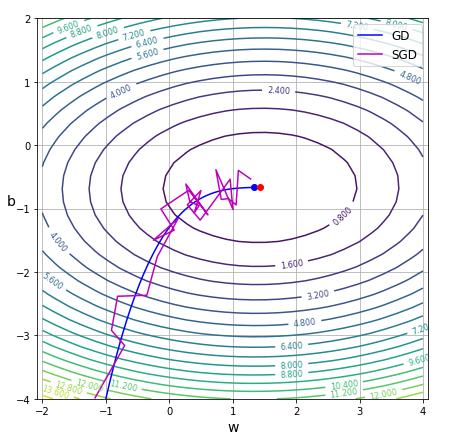

Toinen ongelma kustannusfunktion minimoimisessa on se, että sen "kuvaaja" on allaolevan näköinen eli sillä on useampia "paikallisia" minimikohtia, ja gradient descent saattaa päätyä "alimman laakson" sijaan jonkun toisen, ylempänä olevan laakson pohjalle. Tätä riskiä voi yrittää pienentää kokeilemalla useilla kertoimien lähtöarvoilla ja käyttämällä hienostuneempia minimimointistrategioita SGD:n sijaan.

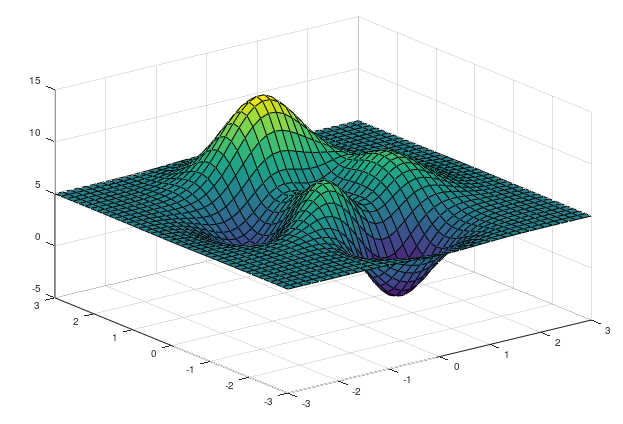

Neuroverkkoja voi rakentaa ja kouluttaa (eli etsiä niiden kertoimet) kirjastojen [TensorFlow](https://www.tensorflow.org/) ja [Keras](https://keras.io/) avulla.






In [ ]:
#rakennetaan ylläoleva neuroverkko TensorFlow-Kerasilla:

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Input, Dense


model=Sequential()
model.add(Input(shape=(2,))) #input-kerros
model.add(Dense(5, activation='sigmoid')) #piilokerros
model.add(Dense(1, activation='sigmoid')) #output-kerros

#verkon tiivistelmä
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#valitaan optimointimenetelmä kustannusfunktion minimointiin 
#SGD=stochastic gradient descent
from tensorflow.keras.optimizers import SGD

#valitaan kustannusfunktio (loss) ja mallin hyvyyden mittari (metrics)
#accuracy = oikein luokiteltujen osuus
model.compile(optimizer=SGD(learning_rate=10),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#etsitään neuroverkolle kertoimet eli minimoidaan kustannusfunktio
#datapisteet 2D-matriisin x vaakariveinä ja
#niiden luokat 0/1 1D-vektorissa y

history=model.fit(x,y,batch_size=200,epochs=1000,verbose=1)
#epochs = montako kertaa datapisteet käydään läpi
#batch_size = monenko datapisteen perusteella kertoimia päivitetään 
#verbose=0, jos et halua allaolevan näköistä tulostetta minimoinnin etenemisestä

Epoch 1/1000
1/1 [==============================] - 1s 946ms/step - loss: 0.6905 - accuracy: 0.6050
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6476 - accuracy: 0.7700
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.6203 - accuracy: 0.6450
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.9484 - accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 15ms/step - loss: 3.0729 - accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.3345 - accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.0876 - accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.0283 - accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.0244 - accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.9746 - accuracy: 0.5000
Epoch 11/

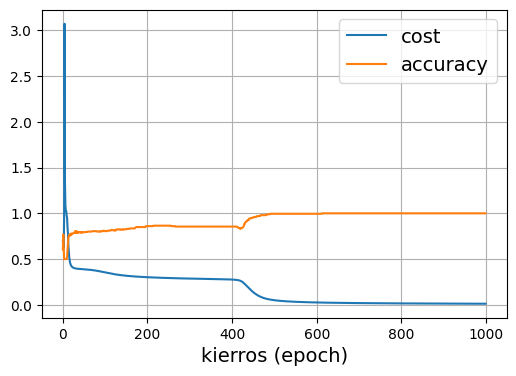

In [ ]:
#kustannusfunktion ja luokittelun tarkkuuden kuvaajat

cost = history.history['loss'] 
accuracy = history.history['accuracy']

plt.figure(figsize=(6,4))
plt.plot(cost,label='cost')
plt.plot(accuracy,label='accuracy')
plt.grid()
plt.xlabel('kierros (epoch)',fontsize=14)
plt.legend(loc='best',fontsize=14)
plt.show()

In [ ]:
#kustannusfunktion arvo (loss) ja luokittelun tarkkuus (accuracy)
#viimeisillä kertoimilla
model.evaluate(x,y) 

7/7 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 1.0000


[0.011711770668625832, 1.0]

In [ ]:
#viimeiset kertoimet
weights = model.get_weights()

w1=weights[0]
b1=weights[1]
w2=weights[2]
b2=weights[3]


In [ ]:
np.set_printoptions(precision=4)
w1

array([[ 10.6511,  12.1409,   3.7808,  -5.2281, -11.5838],
       [  7.1012, -10.2565,   2.7199,  11.8291,   6.7799]], dtype=float32)

In [ ]:
#testipisteen luokittelu
xt=np.array([[0.1,-0.4]]) #(1,2)-vaakavektori
a2t=model.predict(xt) #todennäköisyys, että xt kuuluu luokkaan 1
print(a2t)


1/1 [==============================] - 0s 42ms/step
[[0.3508]]


In [ ]:
#sama matriiseilla
z1=xt@w1+b1
a1=1/(1+np.exp(-z1))
z2=a1@w2+b2
a2=1/(1+np.exp(-z2))
print(a2)

[[0.3508]]


176/176 [==============================] - 0s 1ms/step


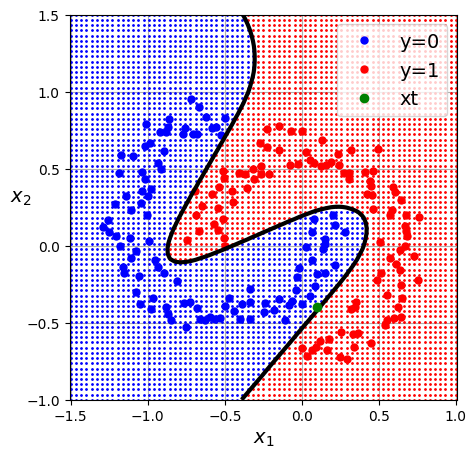

In [ ]:
#syntyvä tason pisteiden luokittelu
M=75
x1=np.linspace(-1.5,1,M)
x2=np.linspace(-1,1.5,M)
x1,x2=np.meshgrid(x1,x2)
X1=x1
X2=x2
x1=x1.reshape((M*M,1))
x2=x2.reshape((M*M,1))
xx=np.hstack((x1,x2))
aa2=model.predict(xx)
AA2=aa2.reshape((M,M))

plt.figure(figsize=(5,5))
plt.plot(x[y==0,0],x[y==0,1],'bo',markersize=5,label='y=0')
plt.plot(x[y==1,0],x[y==1,1],'ro',markersize=5,label='y=1')
plt.plot(x1[aa2>0.5],x2[aa2>0.5],'r.',markersize=2)
plt.plot(x1[aa2<=0.5],x2[aa2<=0.5],'b.',markersize=2)
plt.contour(X1,X2,AA2,levels=[0.5],colors=['k'],linewidths=[3])
plt.plot(xt[0,0],xt[0,1],'go',label='xt')
plt.axis('equal')
plt.grid()
plt.legend(fontsize=14,loc='upper right')
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.show()

## **Luokittelu, 2 muuttujaa, 3 luokkaa** 



Data: pisteet $x^{(i)}=[x^{(i)}_1,x^{(i)}_2]$ ja niiden luokat $y^{(i)}=1,2,3$, $\quad i=1,2,\dots,m$

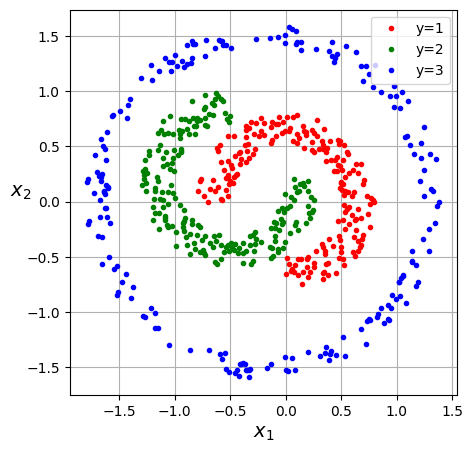

In [ ]:
n=200
m=3*n

#luokan y=1 pisteet
r1=0.3*np.random.rand(n)+0.5
th1=-np.pi/2+np.linspace(0,1.5*np.pi,n)
x1pun=r1*np.cos(th1)
x2pun=r1*np.sin(th1)
x1pun=x1pun.reshape(n,1)
x2pun=x2pun.reshape(n,1)
#luokan y=2 pisteet
r2=0.3*np.random.rand(n)+0.5
th2=-np.linspace(0,1.5*np.pi,n)
x1vih=r2*np.cos(th2)-0.5
x2vih=r2*np.sin(th2)+0.2
x1vih=x1vih.reshape(n,1)
x2vih=x2vih.reshape(n,1)
#luokan y=2 pisteet
r3=1.4+np.random.rand(1,n)*0.2
th3=2*np.pi*np.random.rand(1,n)
x1sin=r3*np.cos(th3)-0.2
x2sin=r3*np.sin(th3)
x1sin=x1sin.reshape(n,1)
x2sin=x2sin.reshape(n,1)
#datapisteet matriisin x vaakariveinä
x1=np.vstack((x1pun,x1vih,x1sin))
x2=np.vstack((x2pun,x2vih,x2sin))
x=np.hstack((x1,x2))
#pisteiden luokat vaakavektorissa y
y1=np.ones(n)
y2=2*np.ones(n)
y3=3*np.ones(n)
y=np.hstack((y1,y2,y3))



plt.figure(figsize=(5,5))
plt.plot(x[y==1,0],x[y==1,1],'ro',markersize=3,label='y=1')
plt.plot(x[y==2,0],x[y==2,1],'go',markersize=3,label='y=2')
plt.plot(x[y==3,0],x[y==3,1],'bo',markersize=3,label='y=3')
plt.axis('equal')
plt.grid()
plt.legend(fontsize=10,loc='upper right')
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.show()


Etsitään datapisteiden perusteella kertoimet allaolevaan yhden piilokerroksen neuroverkkoon, jonka piilokerroksessa on 10 neuronia






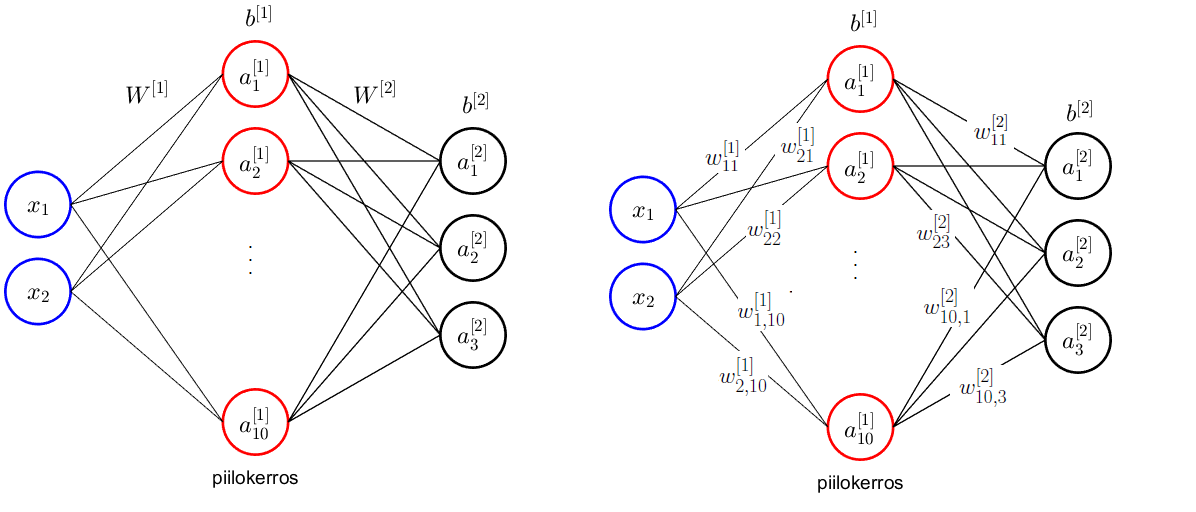

Kertoimet: 

$$
W^{[1]}=\left[\begin{array}{cccc}
w^{[1]}_{11}&w^{[1]}_{12}&\dots&w^{[1]}_{1,10}\\
w^{[1]}_{21}&w^{[1]}_{22}&\dots&w^{[1]}_{2,10}
\end{array}
\right],\quad 
b^{[1]}=\left[
b^{[1]}_1,\,b^{[1]}_2,\,\dots,\,b^{[1]}_{10}
\right],\quad 
 W^{[2]}=\left[\begin{array}{ccc}
w^{[2]}_{11}&w^{[2]}_{12}&w^{[2]}_{13}\\
w^{[2]}_{21}&w^{[2]}_{22}&w^{[2]}_{23}\\
\vdots&\vdots&\vdots\\
w^{[2]}_{10,1}&w^{[2]}_{10,2}&w^{[2]}_{10,3}\\
\end{array}\right],\quad 
 b^{[2]}=\left[
b^{[2]}_1,\,b^{[2]}_2,\,b^{[2]}_3
\right]
$$

Pisteen 
$
x=\left[
x_1,
x_2
\right]$
luokittelu: lasketaan piilokerroksen aktivaatiot

$$
\begin{array}{l}
\\
\end{array}
$$


$$
z^{[1]}=
x@W^{[1]}+b^{[1]}%W^{1}_{j,1}\cdot x_1+W^{1}_{j,2}\cdot x_2+b^1_j
,\quad 
a^{[1]}=g(z^{[1]})
$$

$$
\begin{array}{l}
\\
\end{array}
$$

missä
$
g(z)
$
on  aktivaatiofunktio, ja ulostulokerroksen 

$$
\begin{array}{l}
\\
\end{array}
$$



$$
z^{[2]}=a^{[1]}@W^{[2]} +b^{[2]},\quad 
a^{[2]}=s(z^{[2]}) 
$$


$$
\begin{array}{l}
\\
\end{array}
$$


missä
 $s(z)$ on softmax, eli 


$$
\begin{array}{l}
\\
\end{array}
$$


$$
a^{[2]}_k=\frac{\exp(z^{[2]}_k)}{\exp(z^{[2]}_1)+\exp(z^{[2]}_2)+\exp(z^{[2]}_3)},\quad k=1,2,3
$$


$$
\begin{array}{l}
\\
\end{array}
$$

Piste $x$ kuuluu luokkaan $1,2$ tai $3$ sen mukaan, mikä luvuista $z^{[2]}_1,z^{[2]}_2,z^{[2]}_3$ on suurin.

$$
\begin{array}{l}
\\
\end{array}
$$



Tulkinta:  $x$ kuuluu luokkaan $k=1,2,3$ todennäköisyydellä 
$
a^{[2]}_k
$



Kertoimien määrääminen: minimoidaan kustannusfunktio
(categorical cross entropy)

$$
C=\frac{1}{m} \,\sum_{i=1}^m C^{(i)}$$


missä datapisteen kustannus 

$$C^{(i)}=-\log(a_k^{[2](i)}),\textrm{ kun } y^{(i)}=k
$$

$$
\begin{array}{l}\end{array}
$$



Annetaan kertoimille $W^{[1]},b^{[1]},W^{[2]},b^{[2]}$ alkuarvot

$$
\begin{array}{l}\end{array}
$$


Forward propagation: 
lasketaan  datapisteille 
$
x^{(i)}=
[x_1^{(i)},
x_2^{(i)}
]$ 



$$\begin{array}{l}\\
z^{[1](i)}=x^{(i)}@W^{[1]} +b^{[1]},\quad a^{[1](i)}=g(z^{[1](i)})
\\\\ z^{[2](i)}=a^{[1](i)}@W^{[2]} +b^{[2]},\quad a^{[2](i)}=s(z^{[2](i)})\\\\
\end{array}
$$

$$
\begin{array}{l}\end{array}
$$


Backpropagation: 
lasketaan  $C$:n osittaisderivaatat ja päivitetään kertoimet (gradient descent):

$$
\begin{array}{l}\end{array}
$$

$$
b^{[i]}=b^{[i]}-\alpha\cdot \frac{\partial C}{\partial b^{[i]}}
,\quad 
W^{[i]}=W^{[i]}-\alpha\cdot \frac{\partial C}{\partial W^{[i]}},\quad i=1,2
$$

$$
\begin{array}{l}\end{array}
$$

missä $\alpha>0$ on oppimisnopeus (learning rate)










In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense


model=Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(3,activation='softmax'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                30        
                                                                 
 dense_9 (Dense)             (None, 3)                 33        
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import SGD


model.compile(optimizer=SGD(learning_rate=2),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#sparse = pisteiden luokat 0,1,2
#one-hot-encoding: 1=[1,0,0], 2 = [0,1,0], 3 = [0,0,1]  -> categorical_crossentropy


In [ ]:
#y-1 = luokat 0,1,2 
history=model.fit(x,y-1,batch_size=20,epochs=200)

Epoch 1/200
30/30 [==============================] - 0s 2ms/step - loss: 1.1949 - accuracy: 0.4083
Epoch 2/200
30/30 [==============================] - 0s 2ms/step - loss: 1.0707 - accuracy: 0.4183
Epoch 3/200
30/30 [==============================] - 0s 2ms/step - loss: 0.9865 - accuracy: 0.4633
Epoch 4/200
30/30 [==============================] - 0s 2ms/step - loss: 0.8423 - accuracy: 0.5950
Epoch 5/200
30/30 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.6950
Epoch 6/200
30/30 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.8150
Epoch 7/200
30/30 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.8550
Epoch 8/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8617
Epoch 9/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.8567
Epoch 10/200
30/30 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8667
Epoch 11/

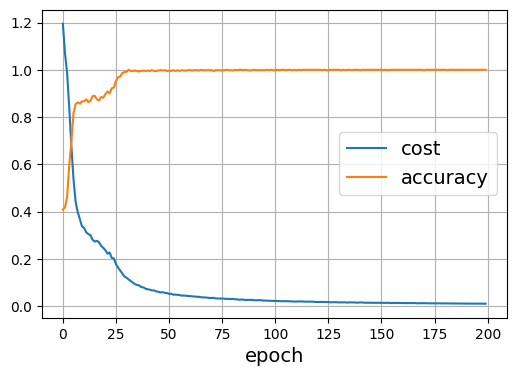

In [ ]:
#kustannusfunktion ja luokittelun tarkkuuden kuvaajat
cost = history.history['loss'] 
accuracy = history.history['accuracy']

plt.figure(figsize=(6,4))
plt.plot(cost,label='cost')
plt.plot(accuracy,label='accuracy')
plt.grid()
plt.xlabel('epoch',fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [ ]:
#kustannusfunktion arvo ja luokittelun tarkkuus
#löydetyillä kertoimilla
model.evaluate(x,y-1) 

19/19 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 1.0000


[0.009692725725471973, 1.0]

In [ ]:
#kertoimet
weights = model.get_weights()
w1=weights[0]
b1=weights[1]
w2=weights[2]
b2=weights[3]

In [ ]:
np.set_printoptions(precision=3,linewidth=100)
w1

array([[-9.420e+00, -5.797e+00,  2.837e+00, -3.368e+00,  9.544e+00,  5.717e+00,  2.579e+00,
        -6.194e+00, -6.348e-01,  7.699e-03],
       [ 7.065e-01,  1.082e+01, -6.764e+00,  4.920e-01, -7.893e+00,  7.449e+00, -2.356e-01,
        -2.565e+00,  9.967e+00,  4.449e-01]], dtype=float32)

In [ ]:
#testipiste
xt=np.array([[0.0,0.5]])
at=model.predict(xt)[0,:] #a1,a2,a3 eli todennäköisyydet, että xt kuuluu luokkaan 1,2,3
print(at) 
yt_pred=np.argmax(at) #ennustettu luokka
print(yt_pred)

1/1 [==============================] - 0s 51ms/step
[9.999e-01 1.335e-04 8.221e-11]
0


In [ ]:
#sama matriiseilla
z1=xt@w1+b1
a1=1/(1+np.exp(-z1))
z2=a1@w2+b2
a2=np.exp(z2)/np.sum(np.exp(z2))
a2

array([[9.999e-01, 1.335e-04, 8.221e-11]])

176/176 [==============================] - 0s 1ms/step


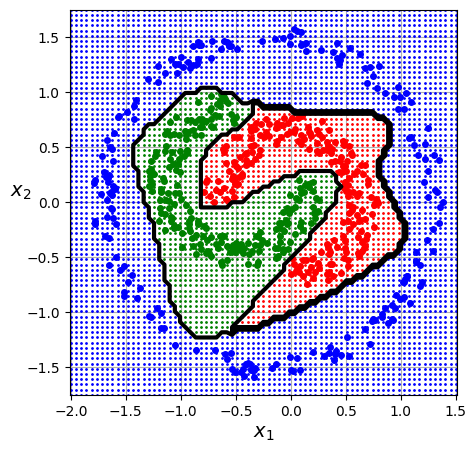

In [ ]:
#syntyvä tason pisteiden luokittelu
M=75
x1=np.linspace(-2,1.5,M)
x2=np.linspace(-1.75,1.75,M)
x1,x2=np.meshgrid(x1,x2)
X1=x1
X2=x2
x1=x1.reshape((M*M,1))
x2=x2.reshape((M*M,1))
xx=np.hstack((x1,x2))

zz=model.predict(xx)
zz2=np.argmax(zz,axis=1)
ZZ2=zz2.reshape((M,M))

plt.figure(figsize=(5,5))
plt.plot(x[y==1,0],x[y==1,1],'ro',markersize=4,label='y=1')
plt.plot(x[y==2,0],x[y==2,1],'go',markersize=4,label='y=2')
plt.plot(x[y==3,0],x[y==3,1],'bo',markersize=4,label='y=3')
plt.plot(x1[zz2==0,0],x2[zz2==0,0],'r.',markersize=2)
plt.plot(x1[zz2==1,0],x2[zz2==1,0],'g.',markersize=2)
plt.plot(x1[zz2==2,0],x2[zz2==2,0],'b.',markersize=2)
plt.contour(X1,X2,ZZ2,levels=[0,1,2],colors=['k'],linewidths=[3])
plt.axis('equal')
plt.grid()
#plt.legend(fontsize=14,loc='upper right')
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.show()

##**Overfitting and regularization**







Neuroverkoissa on yleensä niin  paljon kertoimia, että  laskukaavasta saattaa  tulla liian monimutkainen eli neuroverkko 
  "oppii" kertoimien määräämiseen käytetyn **opetus** eli **training-datan** "ulkoa" (**overfitting**). 
  
  Tällöin   laskukaava  ei  yleisty eli se ei toimi yhtä hyvin uudelle **testi- tai validaatio-datalle**, jota ei käytetty kertoimien määräämisessä. 
	

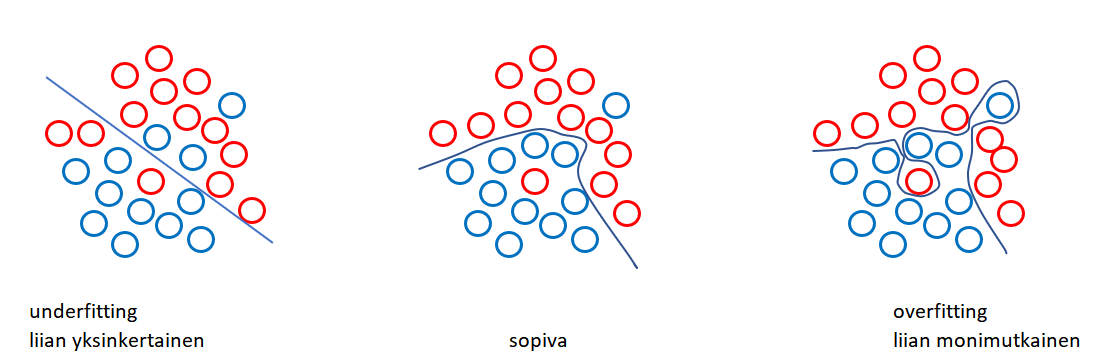

Overfittingiä voidaan yrittää vähentää  **regularisaatio**lla. 

Yksi yleinen regularisaatiomenetelmä on  **dropout**, missä tietty osa (dropout rate) neuroverkon  neuroneista "sammutetaan" kertoimien päivityskierroksen ajaksi.
Sammutettuja neuroneita ei käytetä forward propagationissa ulostulojen laskemiseen eikä niihin liittyviä kertoimia päivitetä backpropagationin aikana.


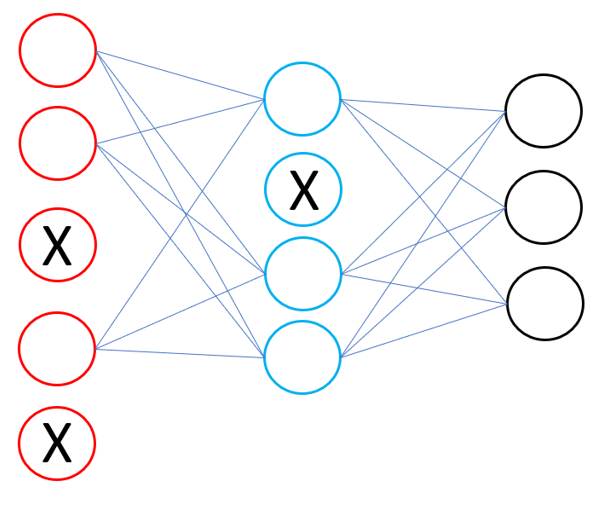

Data jaetaan yleensä kolmeen osaan, opetus- , validaatio- ja testidataksi
(training, validation, test). Neuroverkon kertoimet etsitään
opetusdatan avulla (minimoimalla kustannusfunktio),
ja ns. hyperparametrit (esimerkiksi piilokerrosten
määrä, piilokerrosten neuronien määrä, epochien
määrä, batch size, learning rate, dropout rate, jne) valitaan niin, että
saadaan paras tulos validaatiodatalle.
Lopuksi verkon suorituskykyä testataan
testidatalla, jota ei ole käytetty missään vaiheessa
kertoimien määräämisessä.

## **Luokittelu, 784 muuttujaa, 10 luokkaa**





[MNIST](http://yann.lecun.com/exdb/mnist/)(Modified National Institute of Standards and Technology)-datajoukko: mustavalkoisia 28x28-kuvia käsinkirjoitetuista numeroista 0-9

60000 training kuvaa, 10000 testi/validaatio kuvaa

In [ ]:
#luetaan MNIST-data
from tensorflow.keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

#xtrain = (60000,28,28)-array, training-kuvat, pikseliarvot kokonaislukuja 0-255, 0 = musta, 255 = valkea 
#ytrain = (60000,)-array, training-kuvien numeroarvot
#xtest = (10000,28,28)-array, test-kuvat, pikseliarvot kokonaislukuja 0-255 
#ytrain = (10000,)-array, test-kuvien numeroarvot

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
np.set_printoptions(linewidth=1000)
print(xtrain[0])
print(ytrain[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [ ]:
#pikseliarvot välille 0...1, tyypiksi float
xtrain=xtrain/255.0 
xtest=xtest/255.0 

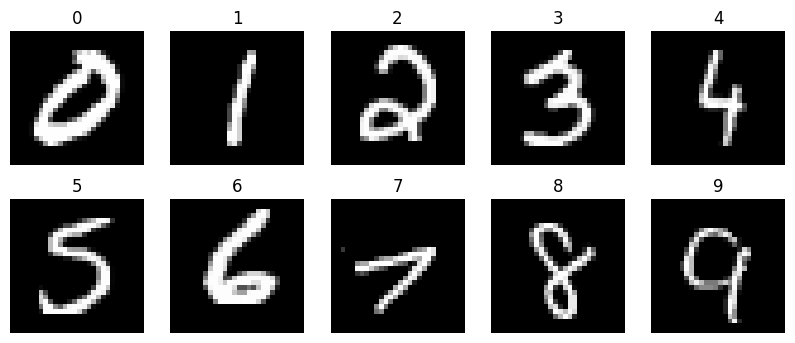

In [ ]:
#esimerkkikuvat numeroista 0...9
plt.figure(figsize=(10,4))
for k in range(10):
  xtraink=xtrain[ytrain==k] #numeroa k esittävät kuvat
  mk=xtraink.shape[0]
  m=np.random.randint(mk)
  plt.subplot(2,5,k+1)
  plt.imshow(xtraink[m], cmap = 'gray') #0 = musta, 1 = valkoinen
  plt.title(str(k))
  plt.axis('off')
plt.show()


Muutetaan 28x28-kuvat 784:n pituisiksi vektoreiksi

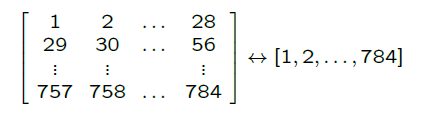

In [ ]:
Xtrain=xtrain.reshape((60000,784))
Xtest=xtest.reshape((10000,784))

ja muodostetaan yhden piilokerroksen neuroverkko niiden luokittelemiseksi 

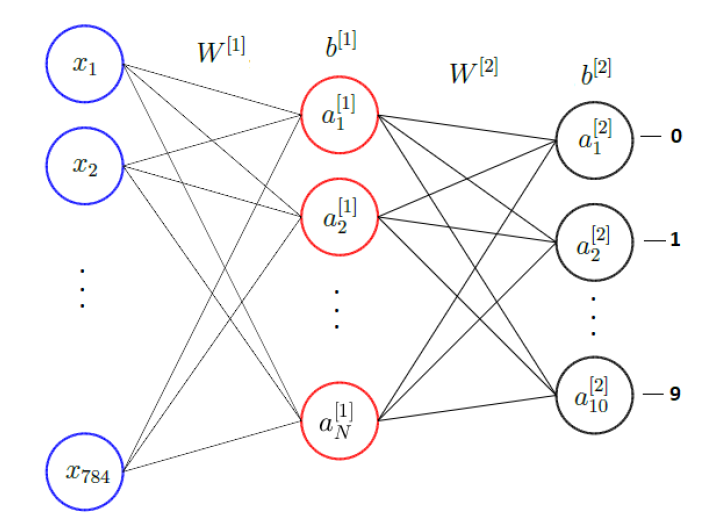

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

N=50 #piilokerroksen neuronien määrä

model = Sequential()
model.add(Input(shape=(784,))) 
model.add(Dense(N, activation='relu')) #piilokerros
model.add(Dense(10, activation='softmax')) #output-kerros

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                39250     
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#valitaan optimointimenetelmä ja kustannusfunktio
#Adam=adaptive moment estimation, hienostuneempi versio gradient descentistä
from tensorflow.keras.optimizers import Adam 

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#sparse = datapisteiden luokat kokonaislukuja 0,1,2,...,9
#accuracy = oikein luokiteltujen osuus

In [ ]:
#etsitään kertoimet eli minimoidaan kustannusfunktio
#Huom: ensimmäisellä kerralla modelin luomisen jälkeen kertoimet alustetaan satunnaisesti
#seuraavilla kerroilla model.fit jatkaa edellisen session viimeisistä kertoimista
history=model.fit(Xtrain, ytrain,
                  epochs=100,
                  batch_size=100, 
                  validation_data=(Xtest,ytest))

Epoch 1/100
600/600 [==============================] - 5s 7ms/step - loss: 0.4213 - accuracy: 0.8840 - val_loss: 0.2376 - val_accuracy: 0.9346
Epoch 2/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2148 - accuracy: 0.9393 - val_loss: 0.1852 - val_accuracy: 0.9486
Epoch 3/100
600/600 [==============================] - 2s 4ms/step - loss: 0.1662 - accuracy: 0.9524 - val_loss: 0.1536 - val_accuracy: 0.9545
Epoch 4/100
600/600 [==============================] - 2s 4ms/step - loss: 0.1352 - accuracy: 0.9617 - val_loss: 0.1352 - val_accuracy: 0.9605
Epoch 5/100
600/600 [==============================] - 2s 4ms/step - loss: 0.1141 - accuracy: 0.9675 - val_loss: 0.1189 - val_accuracy: 0.9643
Epoch 6/100
600/600 [==============================] - 3s 6ms/step - loss: 0.0990 - accuracy: 0.9715 - val_loss: 0.1149 - val_accuracy: 0.9651
Epoch 7/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0871 - accuracy: 0.9750 - val_loss: 0.1045 - val_accuracy: 0.9682

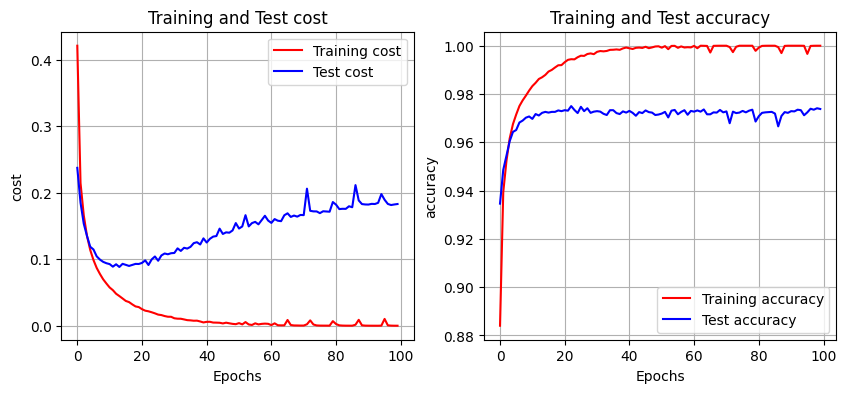

In [ ]:
train_cost = history.history['loss'] 
test_cost = history.history['val_loss']
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_cost, 'r', label='Training cost')
plt.plot(test_cost, 'b', label='Test cost')
plt.title('Training and Test cost')
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(train_acc, 'r', label='Training accuracy')
plt.plot(test_acc, 'b', label='Test accuracy')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

Kuten ylläolevista kuvista nähdään, overfitting alkaa n. 15 epochin jälkeen.
Training-datan kustannus pienenee likimain nollaan ja luokittelun tarkkuus kasvaa 100 %:iin, mutta testi-datalle kustannus alkaa kasvaa  ja luokittelun tarkkuus jää hieman yli 97 %:n tasolle. 





In [ ]:
#lisätään dropout-regularisaatiota
from tensorflow.keras.layers import Dropout
# neuroverkko, piilokerroksessa N neuronia
N=50
K=10 #luokkien määrä


model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dropout(rate=0.15)) #sammutetaan 15 % input-kerroksen neuroneista
model.add(Dense(N, activation='relu')) #piilokerros
model.add(Dropout(rate=0.15)) #sammutetaan 15 % piilokerroksen neuroneista 
model.add(Dense(10, activation='softmax')) #output-kerros

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 50)                39250     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#valitaan optimointimenetelmä ja kustannusfunktio

from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#sparse = datapisteiden luokat kokonaislukuja 0,1,2,...,9
#accuracy = oikein luokiteltujen osuus

In [ ]:
#tallennetaan parhaan testi (validaatio)-tarkkuuden antavat kertoimet
#tiedostoon 'mnist_kertoimet.hdf5'

from tensorflow.keras.callbacks import ModelCheckpoint


callback = ModelCheckpoint(
    filepath='mnist_kertoimet.hdf5',
    monitor='val_accuracy',
    mode='max',
    save_weights_only=True,
    save_best_only=True,
    verbose=1)

In [ ]:
# sovitetaan malli eli minimoidaan kustannusfunktio
history=model.fit(Xtrain, ytrain,
                  epochs=100,
                  batch_size=100, 
                  validation_data=(Xtest,ytest),
                  callbacks=[callback])

Epoch 1/100
600/600 [==============================] - ETA: 0s - loss: 0.5140 - accuracy: 0.8493
Epoch 1: val_accuracy improved from -inf to 0.93270, saving model to mnist_kertoimet.hdf5
600/600 [==============================] - 4s 6ms/step - loss: 0.5140 - accuracy: 0.8493 - val_loss: 0.2417 - val_accuracy: 0.9327
Epoch 2/100
596/600 [============================>.] - ETA: 0s - loss: 0.2825 - accuracy: 0.9183
Epoch 2: val_accuracy improved from 0.93270 to 0.94520, saving model to mnist_kertoimet.hdf5
600/600 [==============================] - 3s 5ms/step - loss: 0.2822 - accuracy: 0.9184 - val_loss: 0.1866 - val_accuracy: 0.9452
Epoch 3/100
598/600 [============================>.] - ETA: 0s - loss: 0.2318 - accuracy: 0.9311
Epoch 3: val_accuracy improved from 0.94520 to 0.95460, saving model to mnist_kertoimet.hdf5
600/600 [==============================] - 3s 5ms/step - loss: 0.2316 - accuracy: 0.9312 - val_loss: 0.1548 - val_accuracy: 0.9546
Epoch 4/100
600/600 [===================

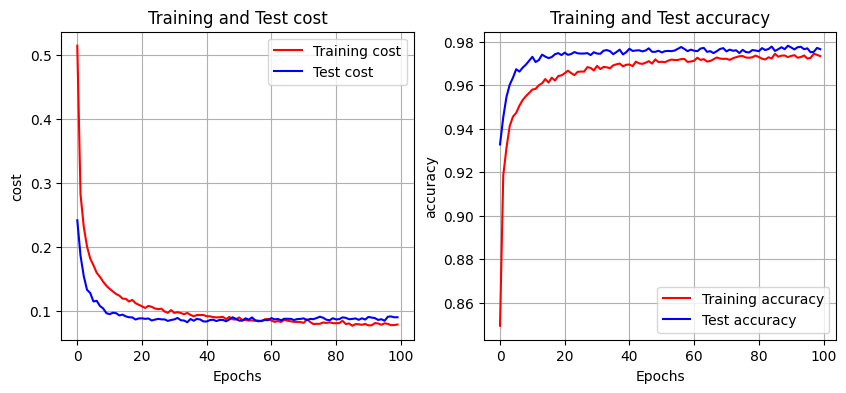

In [ ]:
train_cost = history.history['loss'] 
test_cost = history.history['val_loss']
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_cost, 'r', label='Training cost')
plt.plot(test_cost, 'b', label='Test cost')
plt.title('Training and Test cost')
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(train_acc, 'r', label='Training accuracy')
plt.plot(test_acc, 'b', label='Test accuracy')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

Kuten ylläolevista kuvaajista nähdään, dropout-regularisaatio paransi testitarkkuutta n.98 %:iin. 

Training-tarkkuuden arvot on laskettu "sammutetuin neuronein" eli ylläoleva kuvaaja antaa liian pessimistisen kuvan. 

In [ ]:
#ladataan parhaan testi-tarkkuuden antavat kertoimet
model.load_weights('mnist_kertoimet.hdf5')

model.evaluate(Xtrain,ytrain)
model.evaluate(Xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0870 - accuracy: 0.9781


[0.08700484782457352, 0.9781000018119812]

Training-tarkkuus on parhailla kertoimilla n. 99% ja testi-tarkkuus n. 98 % 
eli overfitting ei ole vielä kokonaan hävinnyt.



In [ ]:
#kiinnitetään google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#ja tallennetaan malli
model.save('/content/drive/MyDrive/mnist_model.h5')

In [ ]:
#tallennetun mallin lataaminen 
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/mnist_model.h5')


In [ ]:
#testikuva nro k
k=np.random.randint(10000) 
xt=Xtest[k]
yt=ytest[k]
at_pred=model.predict(xt.reshape((1,784))) #todennäköisyydet, (1,10)-vaakavektori
yt_pred=np.argmax(at_pred[0,:]) #ennustettu luokka
print(at_pred)
print(yt_pred)

1/1 [==============================] - 0s 54ms/step
[[8.81e-04 3.95e-16 2.34e-05 3.12e-03 2.93e-07 2.58e-03 6.47e-07 3.03e-08 9.93e-01 1.25e-04]]
8


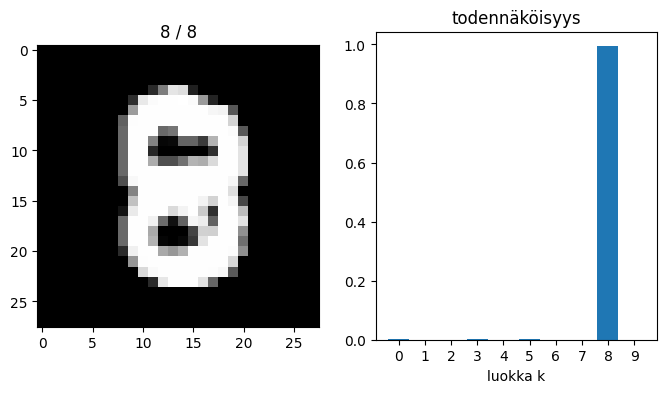

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(xt.reshape((28,28)), cmap = 'gray')
plt.title(str(yt)+' / '+str(yt_pred))

plt.subplot(1,2,2)
plt.bar(np.linspace(0,9,10),at_pred[0,:])
plt.xticks(np.linspace(0,9,10))
plt.xlabel('luokka k')
plt.title('todennäköisyys')
plt.show()

In [ ]:
#testikuvien confusion matrix
from sklearn.metrics import confusion_matrix

ytest_pred=np.argmax(model.predict(Xtest),axis=1)
print(confusion_matrix(ytest, ytest_pred)) #vaakarivi=luokka, pystyrivi = ennustettu luokka

313/313 [==============================] - 1s 2ms/step
[[ 972    0    0    0    0    0    3    3    2    0]
 [   0 1121    5    1    0    0    3    0    5    0]
 [   3    0 1009    4    0    0    1    8    7    0]
 [   0    0    6  983    0    7    0    4    7    3]
 [   1    0    3    0  955    0    9    2    2   10]
 [   2    0    0   13    1  863    5    1    6    1]
 [   2    2    0    1    2    4  945    0    2    0]
 [   3    5   11    2    1    0    0 1000    1    5]
 [   3    1    2    3    4    3    1    3  951    3]
 [   1    2    0    7    7    4    0    5    1  982]]


219


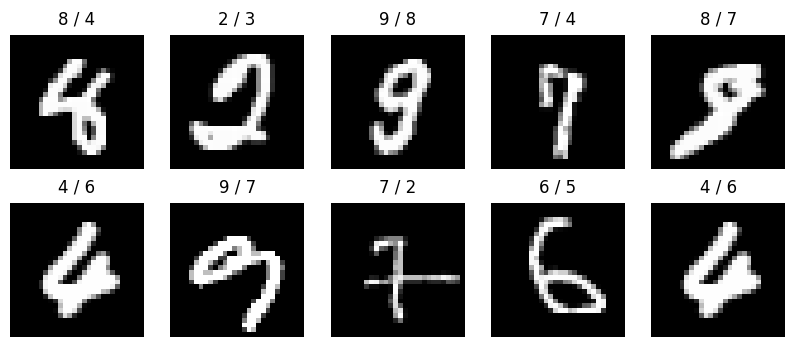

In [ ]:
#esimerkkejä väärin luokitelluista testikuvista 
xtest_vaarin=Xtest[ytest_pred!=ytest,:]
ytest_vaarin=ytest[ytest_pred!=ytest]
ytest_pred_vaarin=ytest_pred[ytest_pred!=ytest]

mv=len(ytest_vaarin)
print(mv)
ind=np.random.randint(0,mv,10)

plt.figure(figsize=(10,4))
for k in range(10):
    plt.subplot(2,5,k+1)
    plt.imshow(xtest_vaarin[ind[k]].reshape((28,28)), cmap='gray')
    plt.axis('off')
    plt.axis('equal')
    plt.title(str(int(ytest_vaarin[ind[k]]))+' / '+
              str(int(ytest_pred_vaarin[ind[k]])))




## **Regressio**










Neuroverkkoja voi käyttää myös regressioon, eli muodostamaan  laskukaava suureelle $y$ muuttujien $x_1,x_2,\dots,x_n$ avulla.

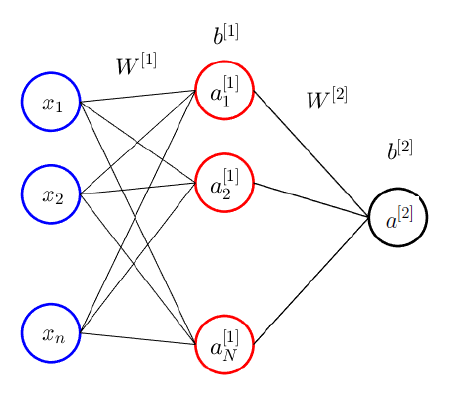

Ulostulokerroksessa ei tällöin käytetä aktivaatiofunktiota eli 
jos 
$x=[x_1,x_2,\dots,x_n]$,
niin
$$\begin{array}{l}\\
z^{[1]}=x@W^{[1]}+b^{[1]},\quad a^{[1]}=g(z^{[1]})\\\\
z^{[2]}=a^{[1]}@W^{[2]} +b^{[2]},\quad a^{[2]}=z^{[2]}\\\\
\end{array}
$$



ja  kustannusfunktio on yleensä jompikumpi seuraavista:

Mean square error (mse):

$$C=\frac{1}{m}\, \sum_{i=1}^m (a^{[2](i)}-y^{(i)})^2$$

Mean absolute error (mae):

$$C=\frac{1}{m}\, \sum_{i=1}^m |a^{[2](i)}-y^{(i)}|$$


### **1 muuttuja** 



datapisteet $x^{(i)},y^{(i)}$ 

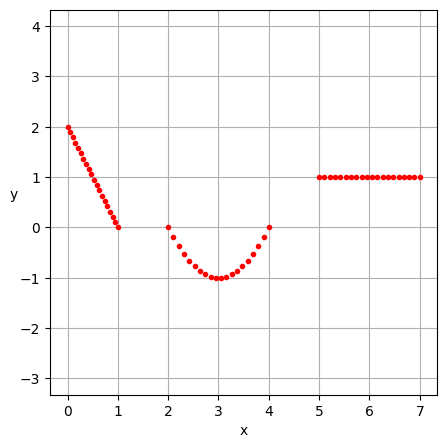

In [ ]:
x1=np.linspace(0,1,20)
y1=np.linspace(2,0,20)

x2=np.linspace(2,4,20)
y2=(x2-3)**2-1

x3=np.linspace(5,7,20)
y3=np.ones(20)

x=np.hstack((x1,x2,x3))
y=np.hstack((y1,y2,y3))


plt.figure(figsize=(5,5))
plt.plot(x,y,'r.')
plt.grid()
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(20, activation='sigmoid')) #piilokerros
model.add(Dense(1)) #output-kerros

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 20)                40        
                                                                 
 dense_15 (Dense)            (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam 
model.compile(optimizer=Adam(learning_rate=0.01),loss='mse',metrics=['mae'])

In [ ]:
history=model.fit(x.reshape((60,1)),y,
                  epochs=3000,
                  batch_size=60)

Striimattava tuloste lyhennetty viimeiseen 5000 riviin.
1/1 [==============================] - 0s 11ms/step - loss: 0.0698 - mae: 0.2008
Epoch 332/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.0698 - mae: 0.2008
Epoch 333/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.0697 - mae: 0.2008
Epoch 334/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.0697 - mae: 0.2007
Epoch 335/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.0697 - mae: 0.2007
Epoch 336/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.0696 - mae: 0.2007
Epoch 337/3000
1/1 [==============================] - 0s 10ms/step - loss: 0.0696 - mae: 0.2006
Epoch 338/3000
1/1 [==============================] - 0s 10ms/step - loss: 0.0696 - mae: 0.2006
Epoch 339/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.0695 - mae: 0.2006
Epoch 340/3000
1/1 [==============================] - 0s 10ms/step - loss: 0.0695 - mae: 0.2005

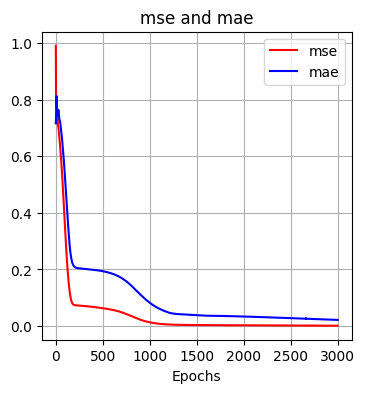

In [ ]:
mse = history.history['loss'] 
mae = history.history['mae']

plt.figure(figsize=(4,4))
plt.plot(mse, 'r', label='mse')
plt.plot(mae, 'b', label='mae')
plt.title('mse and mae')
plt.xlabel('Epochs')
plt.legend()
plt.grid()


32/32 [==============================] - 0s 3ms/step


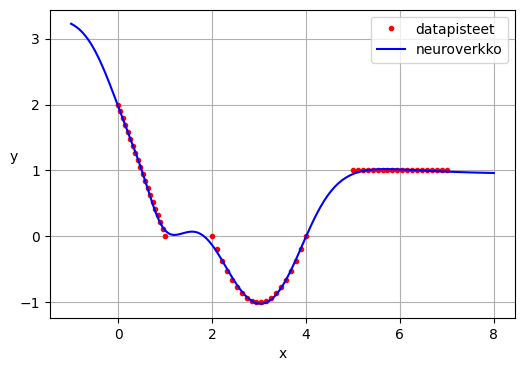

In [ ]:
#neuroverkon ennustamat y:n arvot
xx=np.linspace(-1,8,1000)
ypred=model.predict(xx.reshape((1000,1)))

plt.figure(figsize=(6,4))
plt.plot(x,y,'r.',label='datapisteet')
plt.plot(xx,ypred,'b',label='neuroverkko')
plt.grid()
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.legend()

### **7 muuttujaa**



In [ ]:
#ladataan datajoukko
from tensorflow.keras.utils import get_file
dataset_path = get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

30286/30286 [==============================] - 0s 5us/step


'/root/.keras/datasets/auto-mpg.data'

In [ ]:
#ja luetaan se Pandas-kirjaston dataframeksi
                
import pandas as pd
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
#origin: 1 = USA, 2 = Europe, 3 = Japan

data = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)


In [ ]:
print(data.shape)
data.head(10) #10 ensimmäistä riviä

(398, 8)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


Tavoitteena on ennustaa kulutusta MPG = Miles Per Gallon muuttujien Cylinders - Origin avulla

In [ ]:
#tarkastetaan puuttuvat arvot
data.isna().sum() #monestako datapisteestä koordinaatti puuttuu 

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
#poistetaan puuttuvia arvoja sisältävät datapisteet
data = data.dropna()

In [ ]:
#data np.arrayksi 
data=np.array(data)

In [ ]:
data[0,:]

array([1.80e+01, 8.00e+00, 3.07e+02, 1.30e+02, 3.50e+03, 1.20e+01, 7.00e+01, 1.00e+00])

In [ ]:
x=data[:,1:] #koordinaatit/muuttujat  Cylinders - Origin
y=data[:,0] #MPG

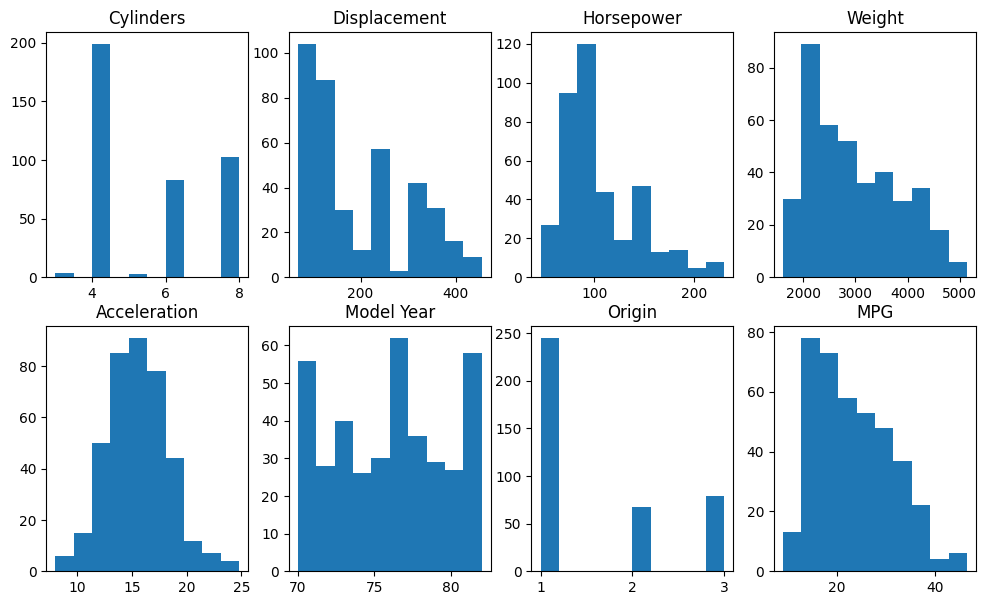

In [ ]:
#koordinaattien ja y = MPG:n arvojen jakaumat
plt.figure(figsize=(12,7))
for k in range(7):
  plt.subplot(2,4,k+1)
  plt.hist(x[:,k])
  plt.title(column_names[k+1])
plt.subplot(2,4,8)
plt.hist(y)
plt.title('MPG')  
plt.show()

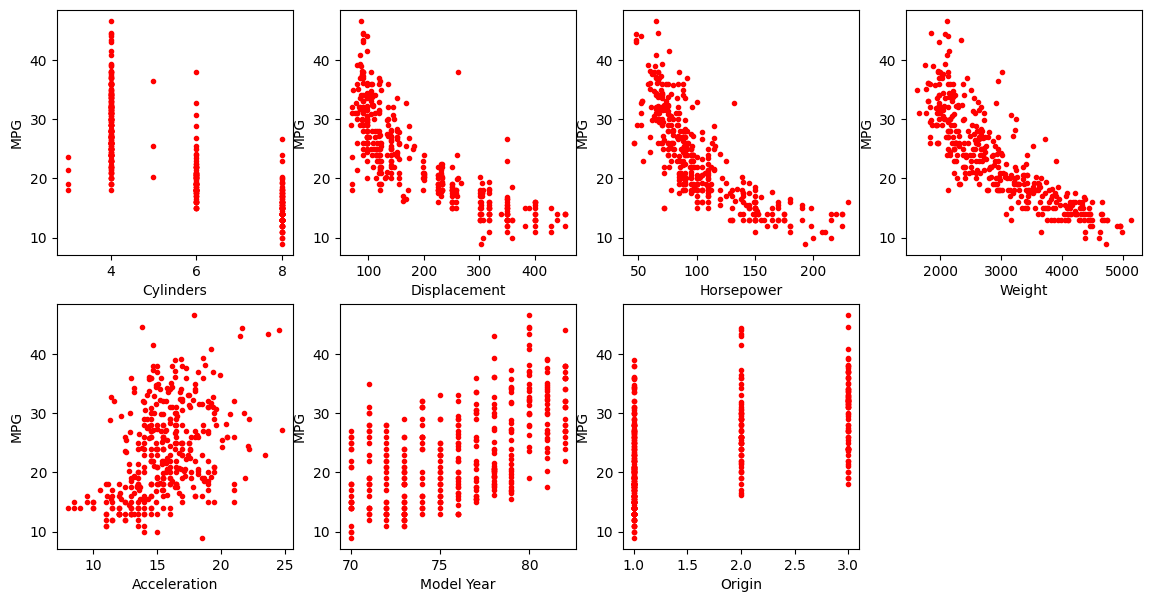

In [ ]:
#MPG:n riippuvuus koordinaateista
plt.figure(figsize=(14,7))
for k in range(7):
  plt.subplot(2,4,k+1)
  plt.plot(x[:,k],y,'r.')
  plt.xlabel(column_names[k+1])
  plt.ylabel('MPG')

In [ ]:
#muunnetaan (kategorinen) muuttuja Origin one-hot-muotoon eli 
#1 -> 1,0,0
#2 -> 0,1,0
#3 -> 0,0,1
xx=np.zeros((392,3))
xx[x[:,6]==1,0]=1
xx[x[:,6]==2,1]=1
xx[x[:,6]==3,2]=1

#ja lisätään datapisteisiin 3 koordinaattia, ja poistetaan alkuperäinen Origin
x2=np.hstack((x[:,:-1],xx))


In [ ]:
x2[0,:]

array([8.00e+00, 3.07e+02, 1.30e+02, 3.50e+03, 1.20e+01, 7.00e+01, 1.00e+00, 0.00e+00, 0.00e+00])

In [ ]:
#jaetaan data training- ja test-osiin (80/20%)
from sklearn.model_selection import train_test_split     
xtrain, xtest, ytrain, ytest = train_test_split(x2, y, test_size=0.2)

In [ ]:
print(xtrain.shape)
print(xtest.shape)

(313, 9)
(79, 9)


In [ ]:
#skaalaus: training-datan koordinaattien keskiarvoiksi 0 ja -hajonnaksi 1
#Tämä helpottaa/nopeuttaa kustannusfunktion minimointia
mu=np.mean(xtrain,axis=0) 
s=np.std(xtrain,axis=0)
xtrain_hat=(xtrain-mu)/s #skaalattu training-data
xtest_hat=(xtest-mu)/s #vastaavasti skaalattu test-data

In [ ]:
print(np.mean(xtrain_hat,axis=0))
print(np.std(xtrain_hat,axis=0))
print(np.mean(xtest_hat,axis=0))
print(np.std(xtest_hat,axis=0))

[-1.05e-16  7.73e-17  1.21e-16 -7.52e-17  2.43e-15  8.07e-16  1.28e-17  7.98e-17  3.48e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 0.02 -0.    0.03  0.09  0.14  0.01  0.12 -0.07 -0.08]
[0.94 0.91 0.91 0.91 0.87 1.02 0.96 0.94 0.94]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
#muodostetaan neuroverkko y:n arvon ennustamiseen
N=64#piilokerroksen neuronien määrä
model = Sequential()
model.add(Input(shape=(9,)))
model.add(Dense(N, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                640       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='mae',metrics=['mse'])
#mse = mean square error
#mae = mean absolute error

In [ ]:
#%% tallennetaan parhaan testi-maen antavat kertoimet 
#tiedostoon 'cars_kertoimet.hdf5'
from tensorflow.keras.callbacks import ModelCheckpoint


callback = ModelCheckpoint(
    filepath='auto_kertoimet.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1)

In [ ]:
history=model.fit(xtrain_hat,ytrain,
                  epochs=500,
                  batch_size=313,
                  validation_data=(xtest_hat,ytest),
                  callbacks=[callback])

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 23.9484 - mse: 632.3525
Epoch 1: val_loss improved from inf to 22.62669, saving model to auto_kertoimet.hdf5
1/1 [==============================] - 1s 756ms/step - loss: 23.9484 - mse: 632.3525 - val_loss: 22.6267 - val_mse: 571.4058
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 23.6047 - mse: 614.6931
Epoch 2: val_loss improved from 22.62669 to 22.33020, saving model to auto_kertoimet.hdf5
1/1 [==============================] - 0s 51ms/step - loss: 23.6047 - mse: 614.6931 - val_loss: 22.3302 - val_mse: 557.4750
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 23.2795 - mse: 598.9001
Epoch 3: val_loss improved from 22.33020 to 22.03435, saving model to auto_kertoimet.hdf5
1/1 [==============================] - 0s 65ms/step - loss: 23.2795 - mse: 598.9001 - val_loss: 22.0344 - val_mse: 543.8090
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 22.9550 - mse: 583.621

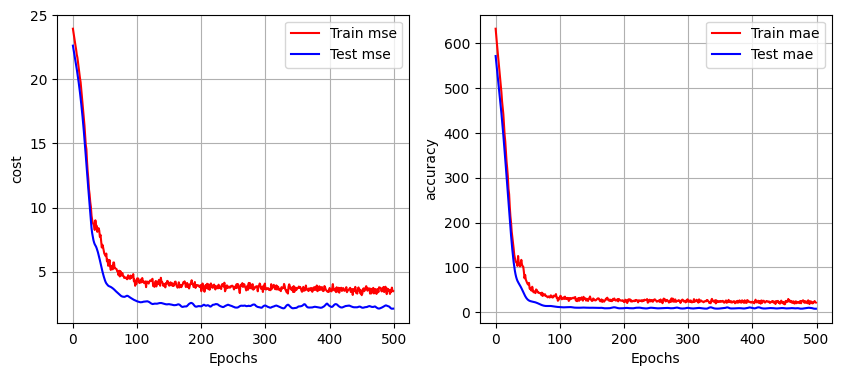

In [ ]:
train_cost = history.history['loss'] 
test_cost = history.history['val_loss']
train_acc = history.history['mse']
test_acc = history.history['val_mse']


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_cost, 'r', label='Train mse')
plt.plot(test_cost, 'b', label='Test mse')
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(train_acc, 'r', label='Train mae')
plt.plot(test_acc, 'b', label='Test mae')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.load_weights('auto_kertoimet.hdf5')

model.evaluate(xtrain_hat,ytrain)
model.evaluate(xtest_hat,ytest)

3/3 [==============================] - 0s 6ms/step - loss: 2.1072 - mse: 7.8371


[2.107184648513794, 7.837144374847412]

In [ ]:
#kiinnitetään google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/auto_model.h5')

In [ ]:
#tallennetun mallin lataaminen
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/auto_model.h5')

3/3 [==============================] - 0s 3ms/step


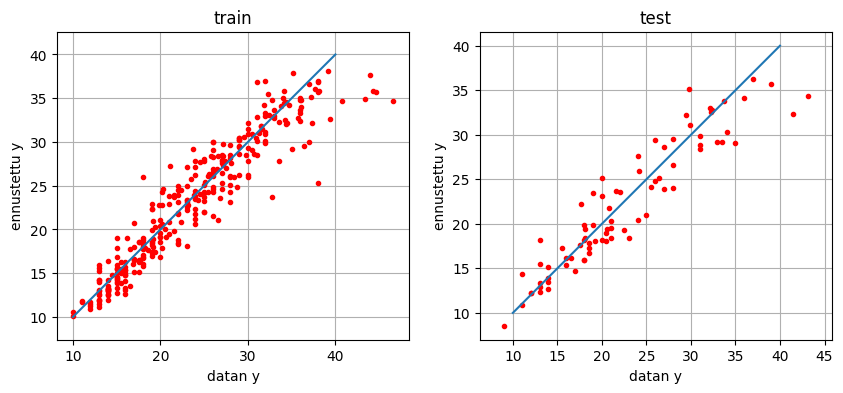

In [ ]:
#datan y vs. ennustettu y
ytrain_pred=model.predict(xtrain_hat)
ytest_pred=model.predict(xtest_hat)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(ytrain,ytrain_pred,'r.')
plt.plot([10,40],[10,40])
plt.title('train')
plt.grid()
plt.axis('equal')
plt.xlabel('datan y')
plt.ylabel('ennustettu y')

plt.subplot(1,2,2)
plt.plot(ytest,ytest_pred,'r.')
plt.title('test')
plt.axis('equal')
plt.plot([10,40],[10,40])
plt.grid()
plt.xlabel('datan y')
plt.ylabel('ennustettu y')
plt.show()

In [ ]:
print(mu)
print(s)

[5.46e+00 1.94e+02 1.04e+02 2.96e+03 1.55e+01 7.60e+01 6.13e-01 1.79e-01 2.08e-01]
[1.73e+00 1.06e+02 3.91e+01 8.62e+02 2.82e+00 3.66e+00 4.87e-01 3.83e-01 4.06e-01]


In [ ]:
#testipiste
#mu=np.array([5.46e+00,1.94e+02,1.04e+02,2.96e+03,1.55e+01,7.60e+01,6.13e-01,1.79e-01,2.08e-01])
#s=np.array([1.73e+00,1.06e+02,3.91e+01,8.62e+02,2.82e+00,3.66e+00,4.87e-01,3.83e-01,4.06e-01])
xt=np.array([[6,301.0,120.0,2504.9,11.1,73,1,0,0]])
#skaalaus
xt_hat=(xt-mu)/s
model.predict(xt_hat)

1/1 [==============================] - 0s 23ms/step


array([[20.22]], dtype=float32)

In [ ]:
#kertoimet
weights = model.get_weights()
W1=weights[0]
b1=weights[1]
W2=weights[2]
b2=weights[3]

In [ ]:
W1.shape

(9, 64)

In [ ]:
z1t=xt_hat@W1+b1
a1t=np.maximum(z1t,0) #relu
z2t=a1t@W2+b2
print(z2t,'\n')


[[20.22]] 

